Veri setinin CSV dosyası yolu: ..\data\raw\styles.csv
Resimlerin bulunduğu klasör yolu: ..\data\raw\images

Veri başarıyla yüklendi. Veri setinden ilk 5 satır:


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt



Veri setinin genel bilgileri (sütunlar, veri tipleri, bellek kullanımı):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB

Toplam benzersiz kıyafet kategorisi ('articleType') sayısı: 143

En yaygın 20 kıyafet kategorisi ve sayıları:
articleType
Tshirts                  7067
Shirts        

C:\Users\emirhan55\AppData\Local\Temp\ipykernel_18724\2820303997.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=article_counts.values, y=article_counts.index, palette="viridis")


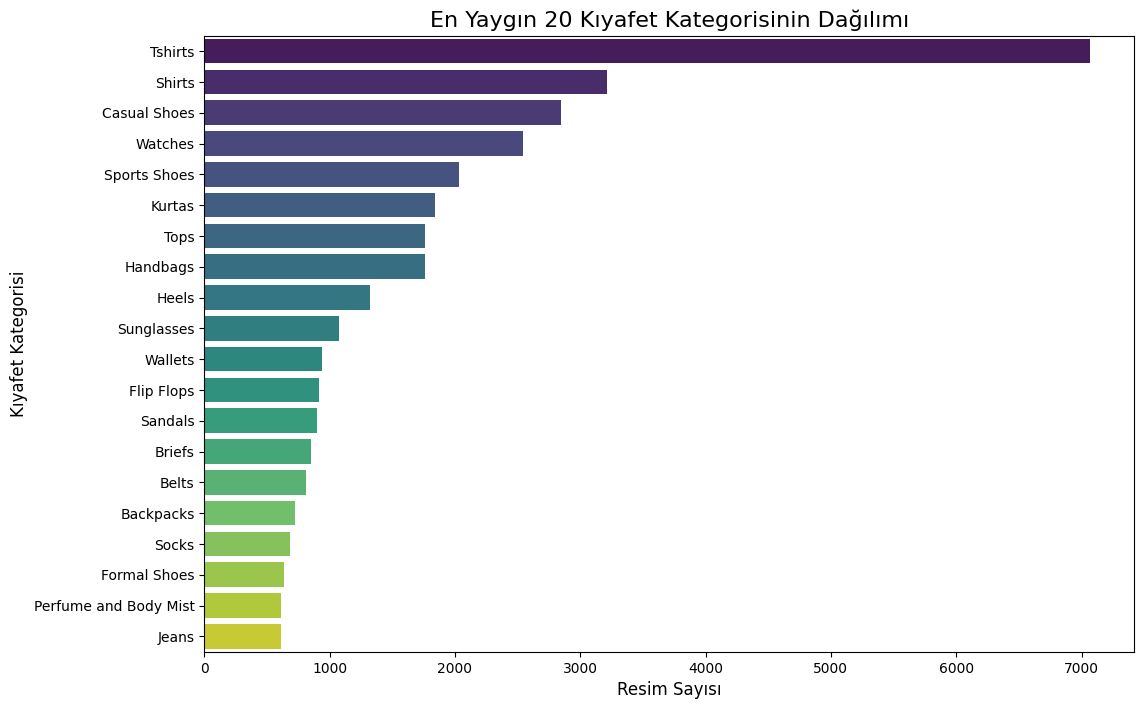


Veri setinden rastgele bir örnek ve görseli:
ID: 18009
Kategori (articleType): Belts
Renk (baseColour): Black
Mevsim (season): Winter


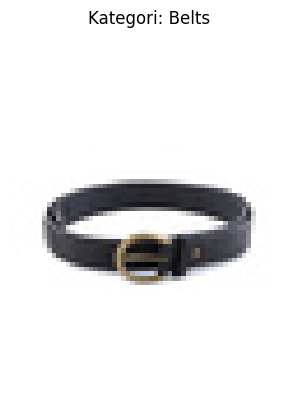

In [1]:
# ==============================================================================
# AURA AI ENGINE - ADIM 2: KEŞİFSEL VERİ ANALİZİ (EDA)
# ==============================================================================
# AMAÇ: İndirdiğimiz moda veri setini anlamak, yapısını incelemek ve
#       model eğitimi için bir strateji geliştirmek.
# ------------------------------------------------------------------------------

# --- ADIM 1: Gerekli Kütüphanelerin Yüklenmesi ve Veri Yollarının Tanımlanması ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

# Veri setimizin bulunduğu ana klasörün yolu.
# Bu not defteri 'notebooks' klasöründe olduğu için, ../ ile bir üst dizine çıkıp
# 'data/raw' yolunu takip ediyoruz. Bu, kodun her bilgisayarda çalışmasını sağlar.
DATA_PATH = os.path.join("..", "data", "raw")
CSV_PATH = os.path.join(DATA_PATH, "styles.csv")
IMAGES_PATH = os.path.join(DATA_PATH, "images")

print(f"Veri setinin CSV dosyası yolu: {CSV_PATH}")
print(f"Resimlerin bulunduğu klasör yolu: {IMAGES_PATH}")


# --- ADIM 2: Meta Veri Dosyasının (styles.csv) Yüklenmesi ve İlk Bakış ---

# 'styles.csv' dosyasını bir pandas DataFrame'ine yüklüyoruz.
# on_bad_lines='skip' parametresi, olası bozuk satırları atlayarak kodun hata vermesini engeller.
try:
    df = pd.read_csv(CSV_PATH, on_bad_lines='skip')
    print("\nVeri başarıyla yüklendi. Veri setinden ilk 5 satır:")
    display(df.head())

    print("\nVeri setinin genel bilgileri (sütunlar, veri tipleri, bellek kullanımı):")
    df.info()

except FileNotFoundError:
    print(f"HATA: {CSV_PATH} bulunamadı. Dosyaları doğru yere koyduğunuzdan emin olun.")


# --- ADIM 3: Kategorik Verilerin Analizi ---

# Bizim için en önemli sütunlardan biri 'articleType', çünkü bu bizim ana sınıf etiketimiz olacak.
print(f"\nToplam benzersiz kıyafet kategorisi ('articleType') sayısı: {df['articleType'].nunique()}")

print("\nEn yaygın 20 kıyafet kategorisi ve sayıları:")
article_counts = df['articleType'].value_counts().head(20)
print(article_counts)


# --- ADIM 4: Kategori Dağılımının Görselleştirilmesi ---

print("\nEn yaygın 20 kategorinin dağılım grafiği:")

plt.figure(figsize=(12, 8)) # Grafiğin boyutunu belirliyoruz.
sns.barplot(x=article_counts.values, y=article_counts.index, palette="viridis")
plt.title('En Yaygın 20 Kıyafet Kategorisinin Dağılımı', fontsize=16)
plt.xlabel('Resim Sayısı', fontsize=12)
plt.ylabel('Kıyafet Kategorisi', fontsize=12)
plt.show()


# --- ADIM 5: Veri ve Resimlerin Eşleştirilmesi (Sağlama Testi) ---

print("\nVeri setinden rastgele bir örnek ve görseli:")

# Veri setinden rastgele bir satır seçiyoruz.
sample = df.sample(1).iloc[0]

# Resim dosyasının tam yolunu oluşturuyoruz. Dosya adı 'id' sütununda ve uzantısı .jpg
image_path = os.path.join(IMAGES_PATH, str(sample['id']) + ".jpg")

try:
    # Resmi açıyoruz
    image = Image.open(image_path)
    
    # Resim bilgilerini ve kendisini ekrana basıyoruz
    print(f"ID: {sample['id']}")
    print(f"Kategori (articleType): {sample['articleType']}")
    print(f"Renk (baseColour): {sample['baseColour']}")
    print(f"Mevsim (season): {sample['season']}")
    
    plt.imshow(image)
    plt.title(f"Kategori: {sample['articleType']}")
    plt.axis('off') # Eksenleri kapatıyoruz
    plt.show()

except FileNotFoundError:
    print(f"SAĞLAMA TESTİ BAŞARISIZ: {image_path} resmi bulunamadı!")
    print("Resimlerin doğru klasörde olduğundan ve ID'lerin eşleştiğinden emin olun.")